# Introduction
이번에는 <EDA To Prediction(DieTanic)>이라는 노트북을 공부해보려한다. 이 노트북은 Ashwini Swain이 3년전에 작성한 노트북으로 2021년 1월 4일 기준 128,239의 조회수와 1797개의 투표를 받은 노트북이다.  
이 노트북의 큰 틀은 아래와 같다.  
  
Part1: Exploratory Data Analysis(EDA):
    - Analysis of the features.
    
    - Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:
    - Adding any few features.

    - Removing redundant features.

    - Converting features into suitable form for modeling.
Part3: Predictive Modeling
    - Running Basic Algorithms.

    - Cross Validation.

    - Ensembling.

    - Important Features Extraction.  
  
# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked** 에 Null 값들이 존재하는데 아래에서 수정할 예정이다.
## How many Survived??

Text(0.5, 1.0, 'Survived')

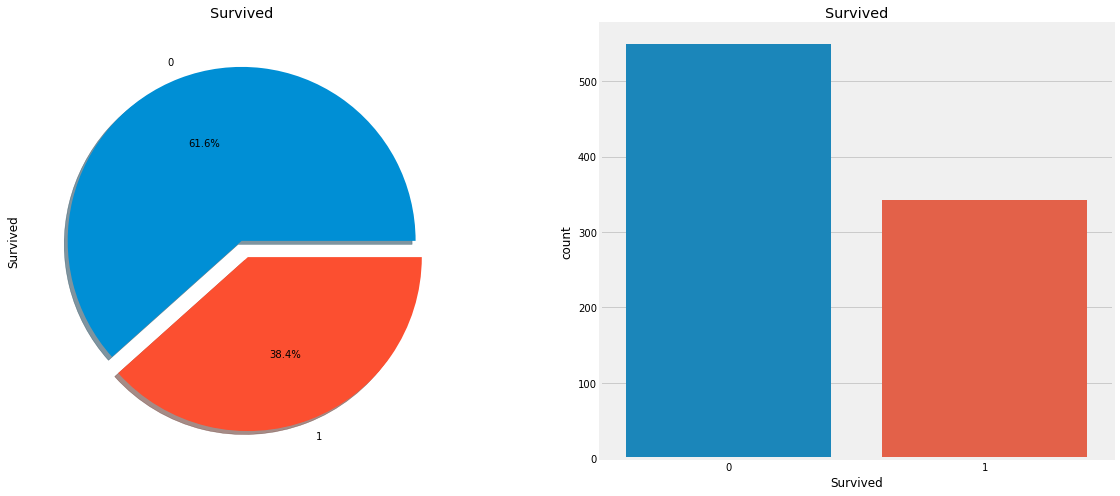

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

트레인 세트의 891명의 승객 중 350명 즉 38.4%만이 생존하였다. 앞으로 *Sex, Embarked, Age* 등의 피처로 생존률에 대해 확인해보자.
## Types of Features
- 범주형 피처: Sex, Embarked  
범주형 피처는 두 개 혹은 그 이상의 값을 가진 피처로, 예를 들어 성별은 남, 여 이렇게 두가지 피처가 있다. 이런 척도는 명목척도라고도 한다.  
  
- 서열형 피처: Pclass  
서열형 피처는 범주형 피처와 유사하지만 그 값들이 상대적 순서가 존재한다. 예를 들어 이 데이터 세트에 있는 *Pclass* 는 1등석, 2등석, 3등석로 분류 된다.  
  
- 연속형 피처: Age  
연속형 피처는 말그대로 숫자가 연속형인 경우이다. 원래는 나이는 28.3세 이런 것은 없지만 이 데이터 세트에는 존재한다.

## Analysing the Features
### Sex

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex: Survived vs Dead')

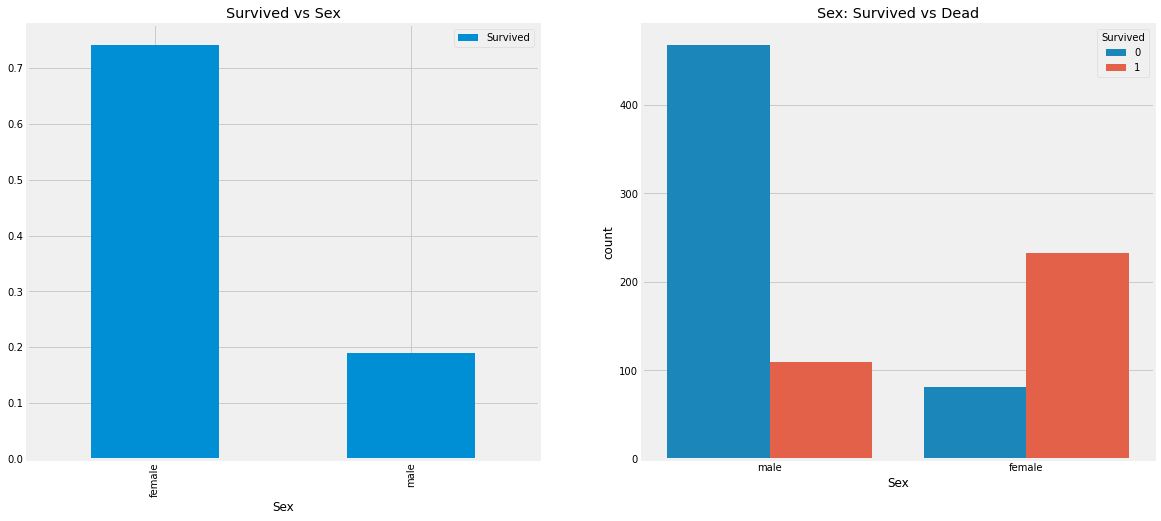

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

배에 탑승한 남성의 수가 여성의 수보다 훨씬 많지만 여성의 생존률이 남성의 거의 두배이다. 여성의 생존률은 약 75%인 반면, 남성의 생존률은 약 18%이다.
### Pclass

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='winter')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

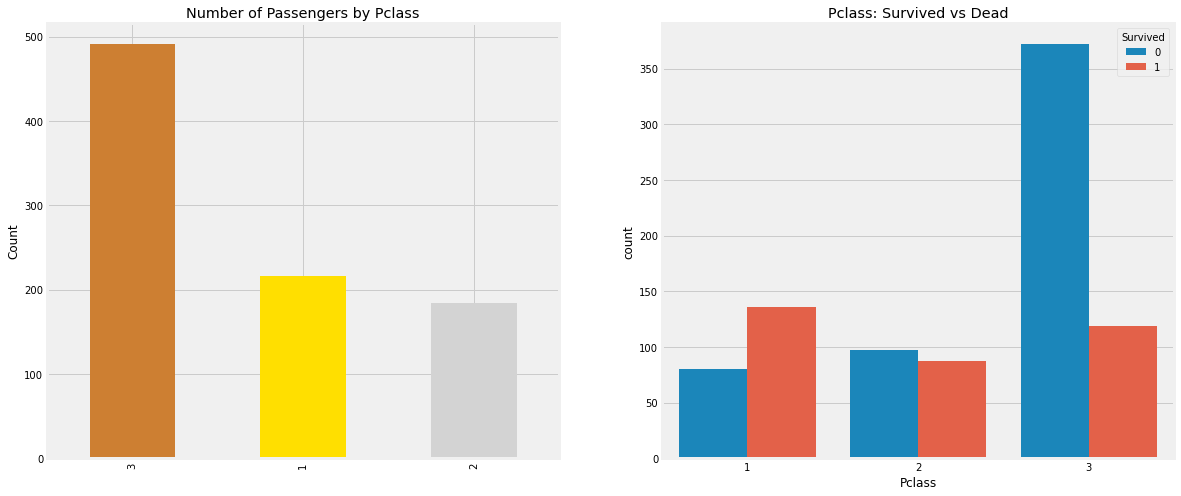

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

3등급 승객의 수가 더 많은데에 비해 승객의 생존률은 *25%* 로 매우 낮다. 1등급 승객은 *63%* 의 생존률, 2등급 승객은 *48%* 생존률로 등급이 높을수록 높은 생존률을 갖는 것을 알 수 있다.

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

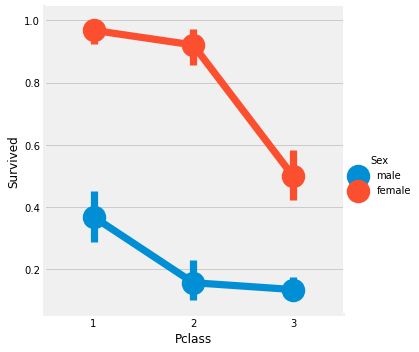

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

크로스탭 교차표와 요인 분석도를 보면 1등급 여성 94명 중 3명만이 사망했기에 1등급 여성 생존률이 약 95%정도라고 추론할 수 있다. 그리고 **Pclass**에 관계없이 여성이 남성보다 구조에 우선권이 있었던 것 같다.
### Age

In [11]:
print(f'나이가 가장 많은 승객: {data.Age.max()} 살')
print(f'나이가 가장 어린 승객: {data.Age.min()} 살')
print(f'승객들의 평균 나이: {np.round(data.Age.mean(), 2)} 살')

나이가 가장 많은 승객: 80.0 살
나이가 가장 어린 승객: 0.42 살
승객들의 평균 나이: 29.7 살


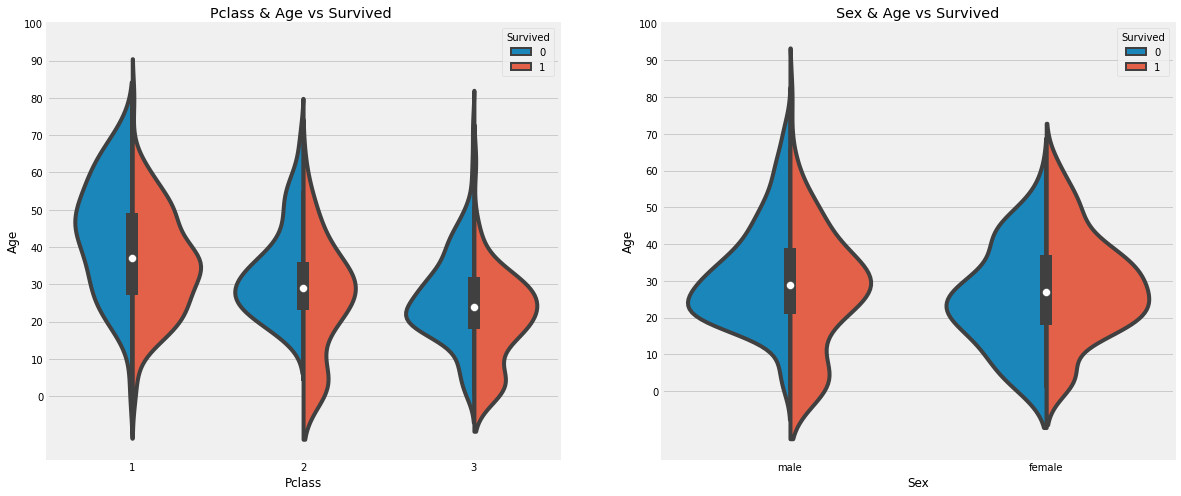

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass & Age vs Survived ')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

1. **Pclass** 가 1등급에서 3등급으로 갈수록 10세 미만의 승객(어린이)의 수가 증가하며 생존률이 증가한다.  
2. 1등급 승객중 20-50대 승객의 생존률이 높고 여성의 생존률이 남성보다 높다.  
3. 남성은 나이가 많을수록 생존률이 줄어든다.  
  
연령에는 177개의 Null 값이 있는데 이는 이름에 있는 Mr, Mrs 등으로 할당할 수 있을거 같다.

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


**Initial** 의 범주가 너무 많으므로 대부분을 차지하는 *Miss, Mr, Mrs* 등으로 대체한다.  
- Mile, Mme, Ms -> Miss  
- Dr, Major, Capt, Sir, Don -> Mr
- Lady, Countess -> Mrs
- Jonkheer, Col, Rev -> Other  

사실 난 여기서 Jonkheer, Col, Rev를 남자로 바꿨으면 어땠을까 생각이 든다. 비교를 위해 한번 내 생각대로 진행해보려한다. 원본대로 하는 것은 [깃허브](https://github.com/Andy-SKlee/SUFE_Study/blob/main/LSK/EDA%20To%20Prediction(DieTanic)_study_02.ipynb)에 올려두었다. 

In [14]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr'],inplace=True)

In [15]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        33.022727
Mrs       35.981818
Name: Age, dtype: float64

#### Filling NaN Ages
위에서 **Initial** 각각의 평균 나이로 나이의 Null 값을 채운다.  
Master: 5, Miss: 22, Mr: 33, Mrs: 36 

In [16]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36

In [17]:
data.Age.isnull().any()

False

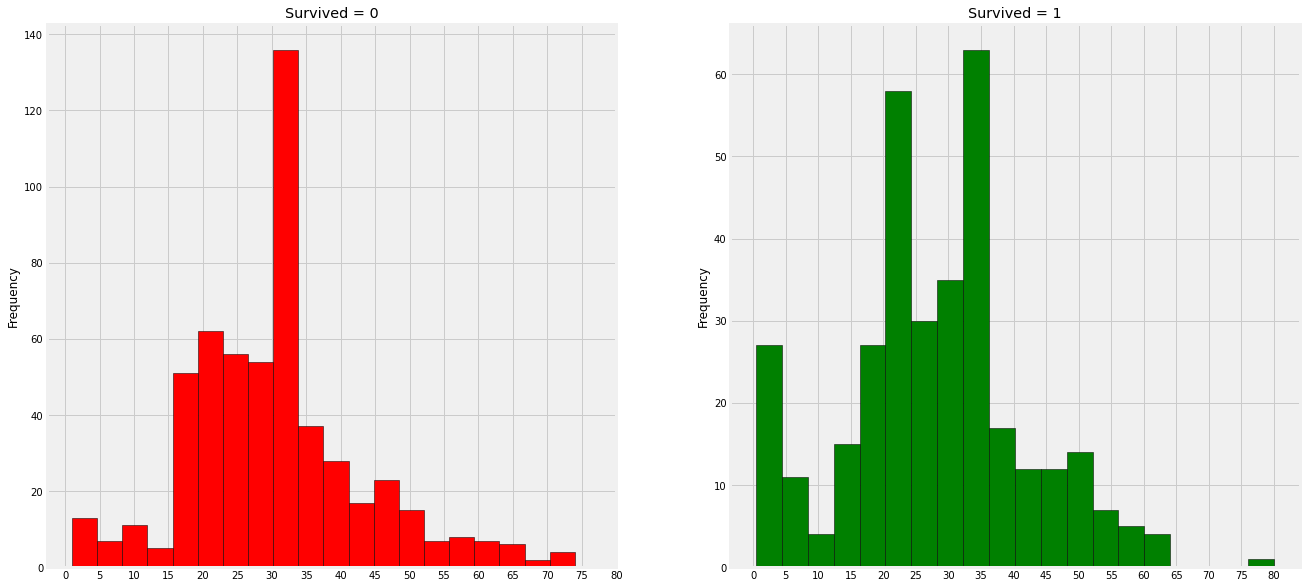

In [18]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)

1. 0-5세 어린이의 생존률이 매우 높다.  
2. 최고령 생존 승객은 80세이다.  
3. 사망자가 많은 나이는 30-35세이다.

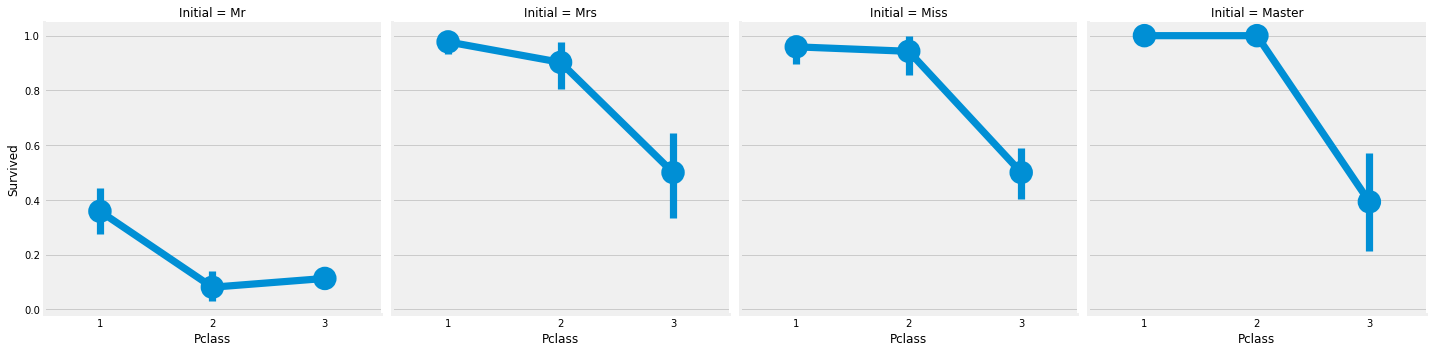

In [19]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

### Embarked

In [20]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

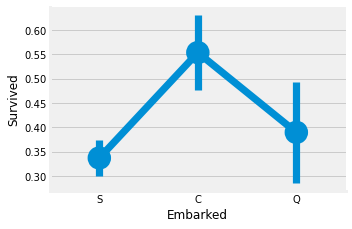

In [21]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)

**C** 에서 탑승한 승객의 생존률이 약 *55%* 정도로 나타나고 **S** 에서 탑승한 승객의 생존률이 가장 낮게 나타난다.

Text(0.5, 1.0, 'Embarked vs Pclass')

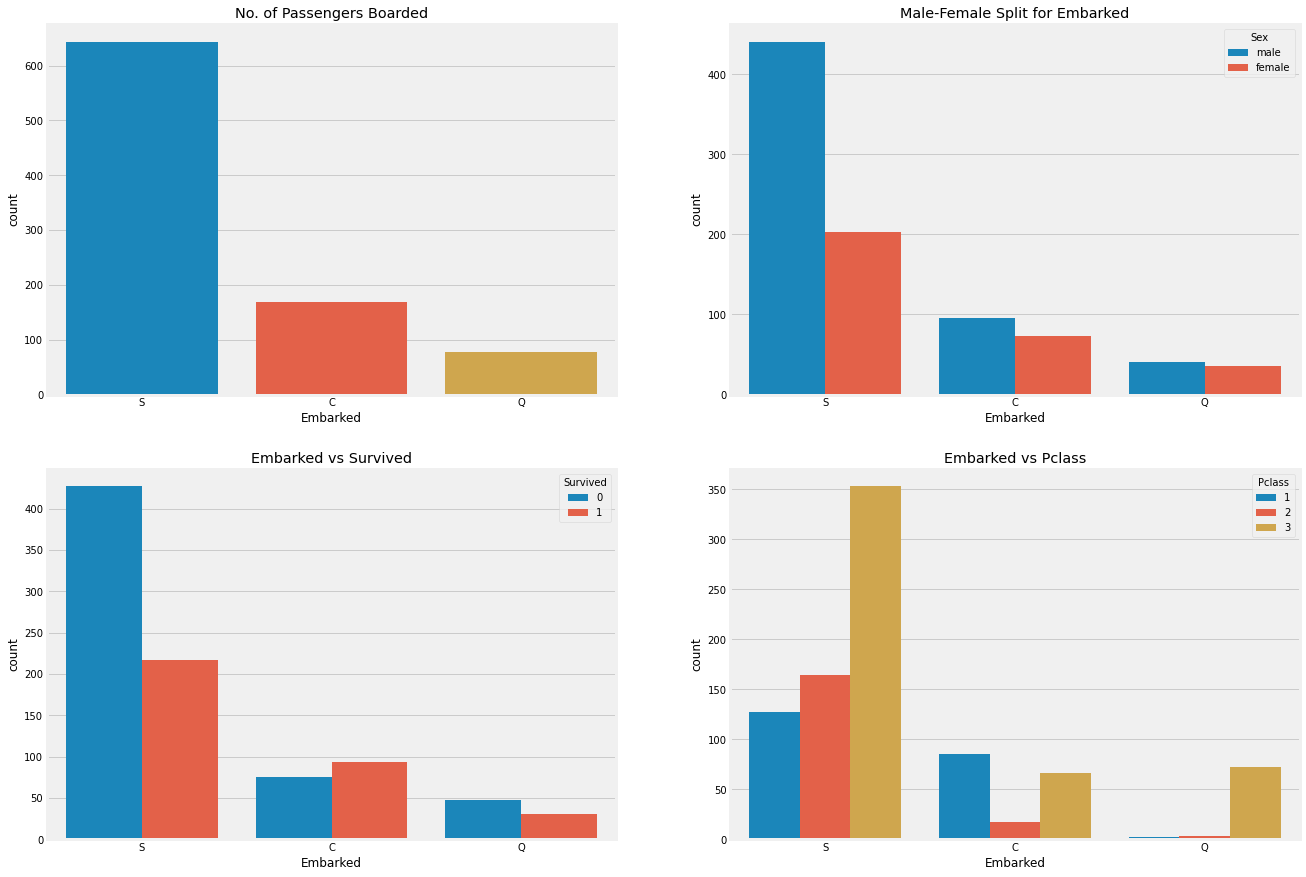

In [22]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

1. S에서 탑승한 승객의 수가 가장 많고 그들은 대부분 3등급 승객이다.  
2. C에서 탑승한 승객의 생존률이 높은 이유는 아마 그들이 1등급 승객이 많아서일 것이다.
3. Q에서 탑승한 승객의 대부분은 3등급 승객이다.

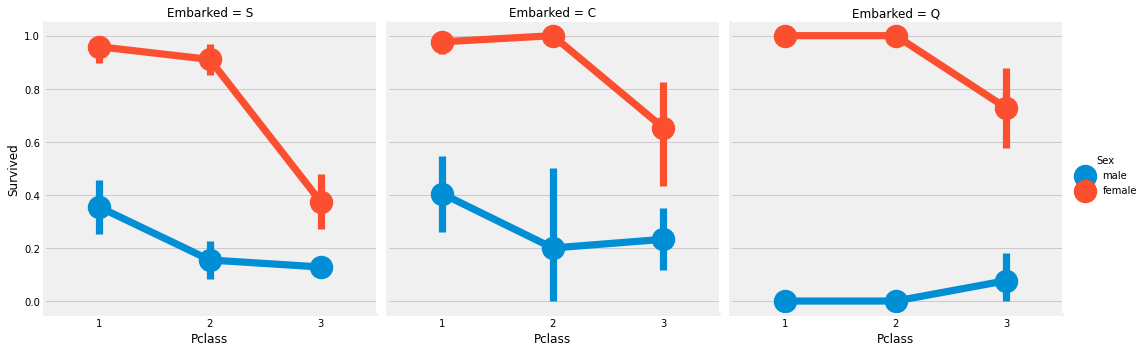

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

1. **Pclass** 가 *1등급, 2등급* 인 경우 여성의 생존률은 1에 근사하다.  
2. *S* 에서 탑승한 3등급 승객은 남녀 구분없이 생존률이 낮다.  
3. *Q* 에서 탑승한 승객은 대부분 3등급 승객이여서 남성의 생존률이 낮게 나타난다.  

#### Filling Embarked NaN  
대부분 승객이 *S* 에서 탑승했으므로 Null 값을 모두 *S* 로 대체한다.

In [24]:
data['Embarked'].fillna('S', inplace=True)
data.Embarked.isnull().any()

False

### SibSp

In [25]:
pd.crosstab(data.Survived, data.SibSp).style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


Text(0.5, 1.0, 'SibSp vs Survived')

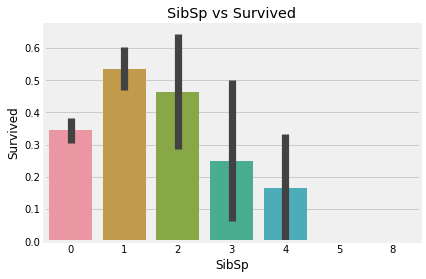

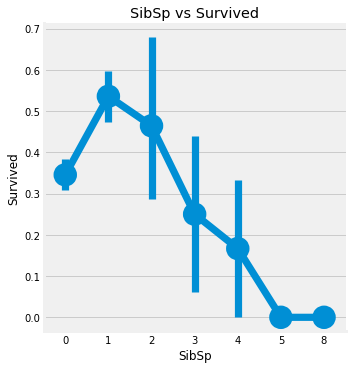

In [26]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')

In [27]:
pd.crosstab(data.Pclass, data.SibSp).style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


혼자 탑승한 경우 생존률은 약 34.5% 정도이고 형제/자매/배우자의 수가 1, 2명일때가 3명 이상일때보다 생존률이 높다. 5-8명의 형제/자매/배우자를 가진 사람의 생존률이 0%인 이유는 Pclass의 영향으로 보인다. 크로스탭 교차표에 따르면 모두 3등급 승객임을 알 수 있다.
### Parch

In [28]:
pd.crosstab(data.Pclass, data.Parch).style.background_gradient(cmap='summer_r')

Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,163,31,21,0,1,0,0
2,134,32,16,2,0,0,0
3,381,55,43,3,3,5,1


Text(0.5, 1.0, 'Parch vs Survived')

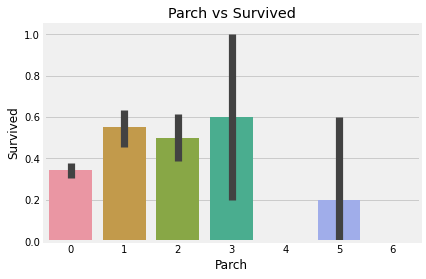

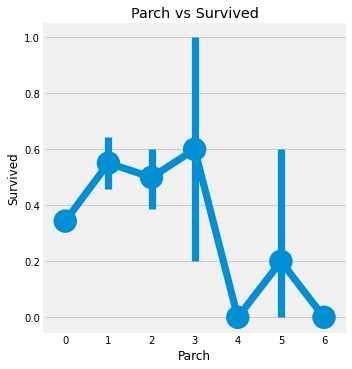

In [29]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')

부모/자식이 1-3명인 승객의 생존률이 혼자 탑승했거나 4-6명인 승객의 생존률보다 높다. 위에 **SibSp**의 경우와 유사하다.
### Fare

In [30]:
print(f'가장 비싼 요금: {data.Fare.max()}')
print(f'가장 싼 요금: {data.Fare.min()}')
print(f'요금의 평균: {np.round(data.Fare.mean(), 4)}')

가장 비싼 요금: 512.3292
가장 싼 요금: 0.0
요금의 평균: 32.2042


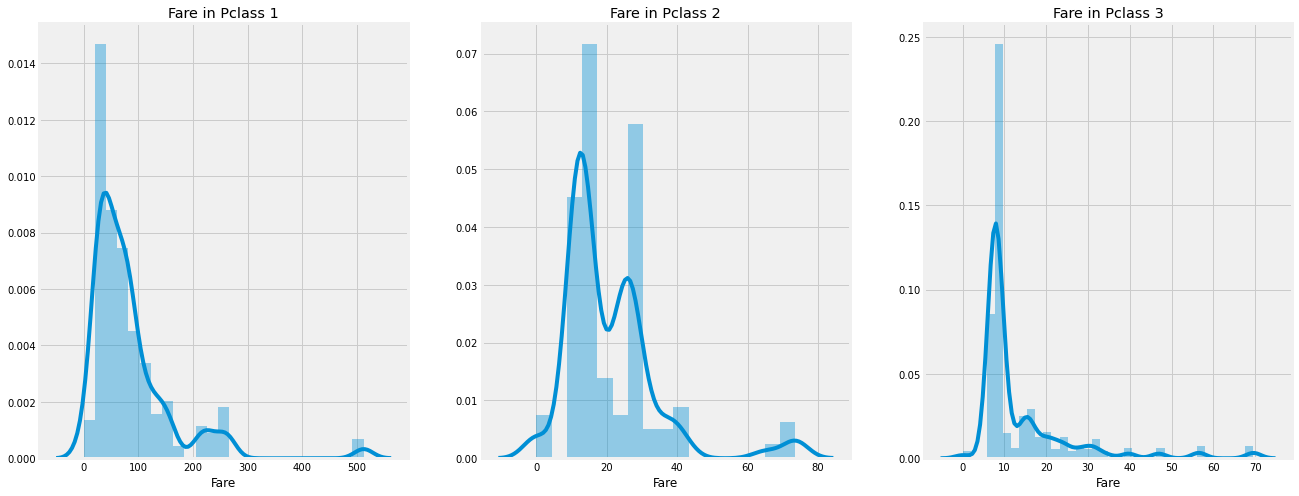

In [31]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
for i in range(3):
    sns.distplot(data[data['Pclass']==i+1].Fare, ax=ax[i])
    ax[i].set_title(f'Fare in Pclass {i+1}')

확실히 1등급의 요금이 2, 3등급보다 비싼 것을 알 수 있다.
### Observations in NutShell for all Features
- Sex: 여성의 생존률이 남성보다 높다.
- Pclass: 1등급의 생존률이 거의 1에 수렴하며 2등급의 생존률이 높고 3등급의 생존률이 낮다.
- Age: 10세 미만의 어린이들의 생존률이 높고 15-35세의 승객들의 사망률이 높다.
- Embarked: 1등급 승객이 많은 C에서 탑승한 승객의 생존률이 가장 높다.
- Parch & SibSp: 1-2명의 형제/자매가 있거나 1-3명의 부모/자식이 있는 승객의 생존률이 혼자거나 대가족인 경우보다 높다.

# Part2: Feature Engineering and Data Cleaning
## Feature Engineering
### Age_band
**Age** 는 연속형 변수인데 연속형 변수는 ML 모델에 영향을 준다. 그래서 카테고리형 변수로 변환해주어야하는데 가장 나이가 많은 승객이 80살이였으니 이를 5개 구간 즉 16살 단위로 나누어 볼 수 있다.

In [32]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [33]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


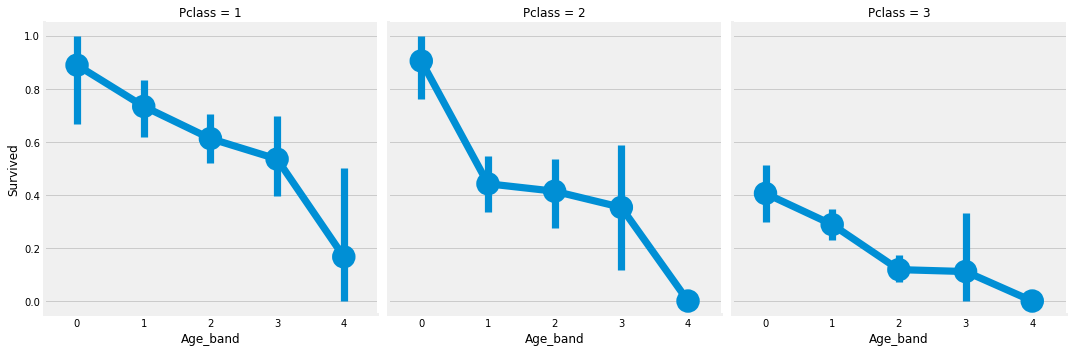

In [34]:
sns.factorplot('Age_band', 'Survived', col='Pclass',data=data)

Pclass에 관계없이 나이가 증가함에 따라 생존률은 감소한다.
### Family_Size and Alone
**Family_Size** 는 *Parch* 와 *SibSp* 를 이용해서 만들 수 있다.

Text(0.5, 1.0, 'Alone vs Survived')

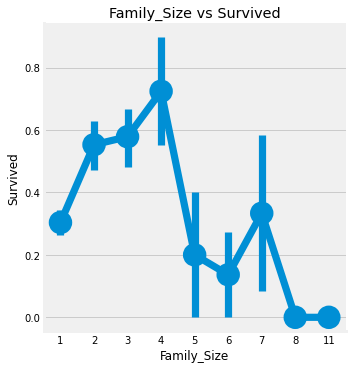

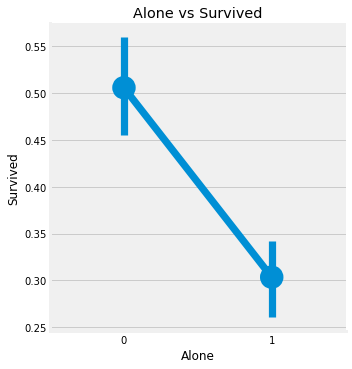

In [35]:
data['Family_Size'] = 0
data['Alone'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
data.loc[data.Family_Size==1, 'Alone'] = 1

sns.factorplot('Family_Size', 'Survived', data=data)
plt.title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data)
plt.title('Alone vs Survived')

**Family_Size = 1** 은 혼자 탑승한 승객을 의미하며, 혼자 탑승한 승객과 **Family_Size** 가 4보다 큰 경우의 생존률이 저조한 것을 알 수 있다.

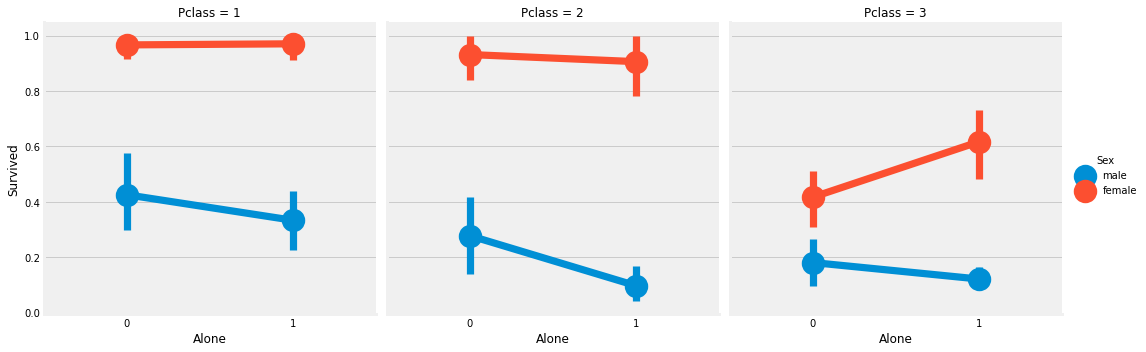

In [36]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')

1등급, 3등급 여성 승객의 경우를 제외하고 혼자 탑승한 경우의 생존률이 더 낮게 나타난다.
### Fare_Range
**Fare** 역시 연속형 변수로 이번엔 `pandas.qcut`을 이용해서 4개의 범위로 나누어보자.

In [37]:
data['Fare_range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


요금이 증가함에따라 생존률도 증가하는 것을 알 수 있다. 이대로 ML 모델에 적용할 수 없으니 **Age_Band** 처럼 인코딩 해줘야한다.

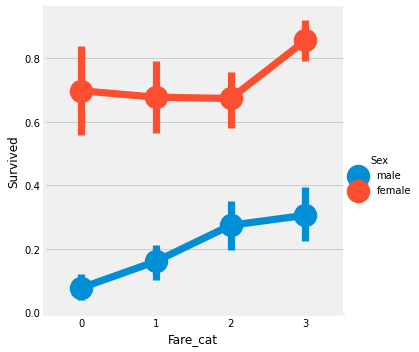

In [38]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')

### Converting String Values into Numeric
문자형인 *Sex, Embarked, Initial* 에 대해 매핑을 진행하자.

In [39]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

## Dropping UnNeeded Features

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

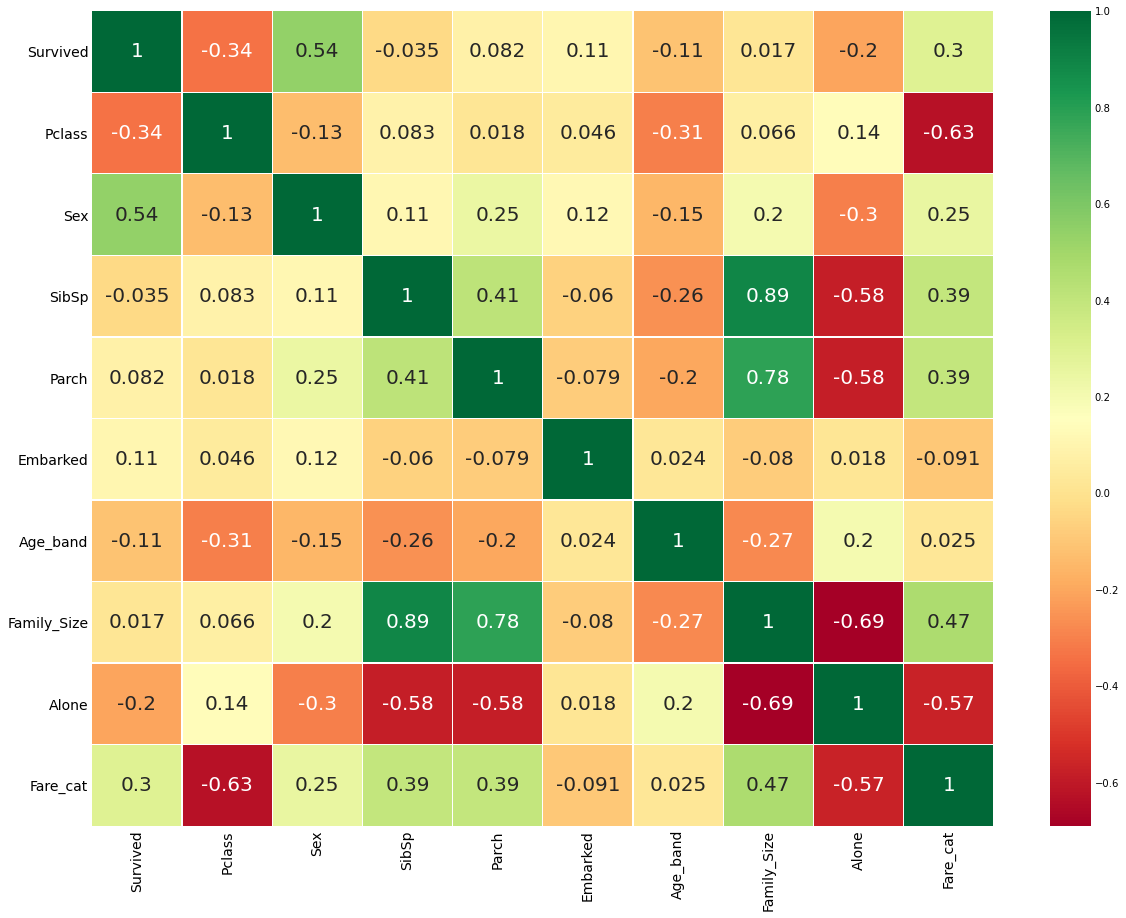

In [40]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Part3: Predictive Modeling
## ML Algorithm
사용할 알고리즘:  
1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [42]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [43]:
model = svm.SVC(kernel='rbf', gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction1, test_Y)}')

Accuracy of the rbf SVM: 0.835820895522388


### Linear Support Vector Machines(linear-SVM)

In [44]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(f'Accuracy of the linear SVM: {metrics.accuracy_score(prediction2, test_Y)}')

Accuracy of the linear SVM: 0.8171641791044776


### Logistic Regression

In [45]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(f'Accuracy of the Logistic Regression: {metrics.accuracy_score(prediction3, test_Y)} ')

Accuracy of the Logistic Regression: 0.8171641791044776 


### Decision Tree

In [46]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print(f'Accuracy of the Decision Tree: {metrics.accuracy_score(prediction4, test_Y)}')

Accuracy of the Decision Tree: 0.8022388059701493


### K-Nearest Neighbors(KNN)

In [47]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print(f'Accuracy of the KNN: {metrics.accuracy_score(prediction5, test_Y)}')

Accuracy of the KNN: 0.8246268656716418


KNN 모델의 **n_neighbors** 값의 디폴트 값은 5이다. 이 값을 0부터 10까지 변화 시키면서 확인해보자.

Accuracies of different values of n are:
 [0.77985075 0.79850746 0.79850746 0.78731343 0.82462687 0.80597015
 0.82089552 0.81716418 0.83208955 0.82089552] 
with the max value as 0.832089552238806


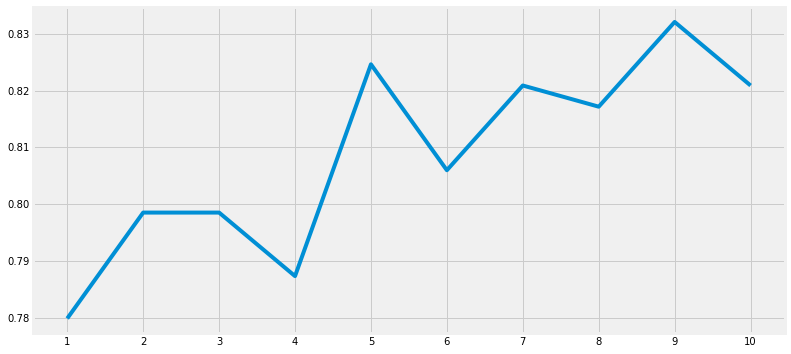

In [48]:
x = list(range(1, 11))
a = pd.Series()
for i in x:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
print(f'Accuracies of different values of n are:\n {a.values} \nwith the max value as {a.values.max()}')

### Gaussian Naive Bayes

In [49]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print(f'Accuracy of the Naive Bayes: {metrics.accuracy_score(prediction6, test_Y)}')

Accuracy of the Naive Bayes: 0.8134328358208955


### Random Forest

In [50]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print(f'Accuracy of the Random Forest: {metrics.accuracy_score(prediction7, test_Y)}')

Accuracy of the Random Forest: 0.8171641791044776


### K-fold Cross Validation

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score

kfold = KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,std
Linear SVM,0.820437,0.042882
Radial SVM,0.829413,0.034694
Logistic Regression,0.818202,0.023813
KNN,0.809288,0.035233
Decision Tree,0.808115,0.031311
Naive Bayes,0.811498,0.029233
Random Forest,0.820474,0.032227


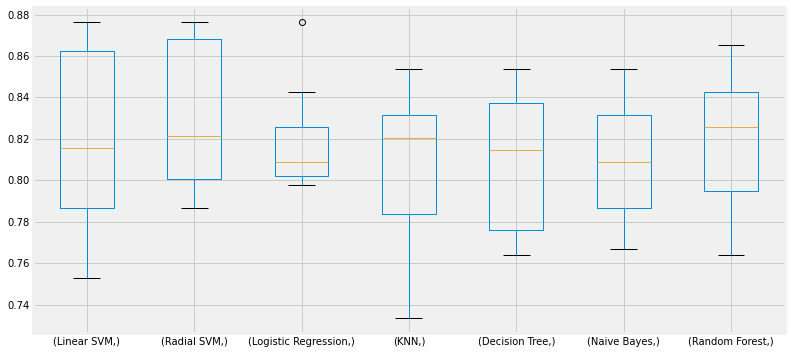

In [52]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

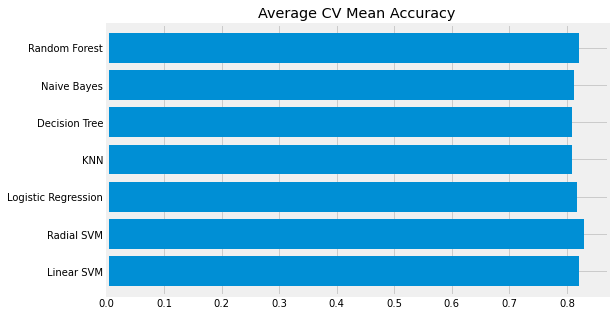

In [53]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)

정확도는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용되어서는 안되기에 오차행렬을 통해 모델의 성능을 확인해 볼 수 있다.
## Confusion Matrix

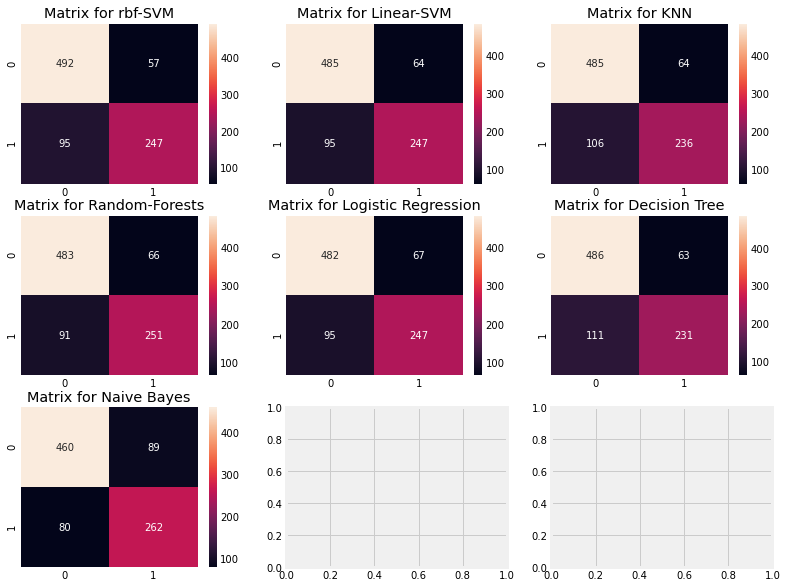

In [54]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)

1. 예측  
첫 번째 그림을 보면 $$\frac{(491+247)}{891}=82.8$$ **82.8%** 정확도로 예측한 것을 알 수 있다.
2. 오류
58명의 사망자를 생존자로 잘못 분류되었고, 95명의 생존자를 사망자로 잘못 분류하였다.  
  
**rbf-SVM** 은 사망자(492명)에 대해 제일 정확하게 예측했고, **Naive Bayes** 는 생존자(262명)에 대해 제일 정확하게 예측했다.
## Hyper-Parameters Tuning
SVM과 Random Forest의 하이퍼 파라미터를 찾아보자.
### SVM

In [55]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293829640323898
{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:   16.3s finished


### Random Forest

In [56]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   30.8s finished


0.8193270981106021
{'n_estimators': 900}


SVM은 *{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}* 에서 **82.94%** 정확도를 보였고, RandomForest는 *{'n_estimators': 900}* 에서 **81.93%** 의 정확도를 보였다.
## Ensembling
앙상블 기법으로는 다음과 같은 방법이 있다.
- Voting
- Bagging
- Boosting

### Voting Classifier
여러 개의 ML 모델의 예측을 결합하는 가장 간단한 방법으로 모든 하위 모델의 예측에 기반한 평균 예측 결과를 제공한다.

In [57]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.6, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))
                                               ], voting='soft').fit(train_X, train_Y)
print(f'The Accuracy for Ensembled Model is: {ensemble_lin_rbf.score(test_X, test_Y)}')
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {cross.mean()}')

The Accuracy for Ensembled Model is: 0.8208955223880597
The cross validated score is: 0.8260424469413234


### Bagging
배깅은 샘플을 여러번 뽑아 각 모델을 학습시켜 결과를 집계하는 방법이다. 배깅은 분산이 높은 모형에서 가장 적합하다. 이는 **KNN** 과 **Decision Tree** 에서 적용해 볼 수 있다.
#### KNN 

In [58]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(f'The Accuracy for Bagged KNN: {metrics.accuracy_score(prediction, test_Y)}')
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {result.mean()}')

The Accuracy for Bagged KNN: 0.832089552238806
The cross validated score is: 0.8137952559300873


#### Decision Tree

In [59]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(f'The Accuracy for Bagged Decision Tree: {metrics.accuracy_score(prediction, test_Y)}')
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {result.mean()}')

The Accuracy for Bagged Decision Tree: 0.8283582089552238
The cross validated score is: 0.8148938826466917


### Boosting
배깅이 일반적인 모델을 만드는데 집중되어있다면, 부스팅은 맞추기 어려운 문제를 맞추는데 초점이 맞춰져있다. 즉, 전체 데이터 집합에 대해 교육을 한 후, 다음 반복에서 잘못 예측된 사례에 더 집중하거나 비중을 두어 잘못 예측된 인스턴스를 올바르게 예측하려고 시도한다.
#### AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for AdaBoost is: {result.mean()}')

The cross validated score for AdaBoost is: 0.8226716604244695


#### Strochastic Gradient Boosting(경사하강법)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for Gradient Boosting is: {result.mean()}')

The cross validated score for Gradient Boosting is: 0.8137952559300874


#### XGBoost

In [62]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for XGBoost is: {result.mean()}')

The cross validated score for XGBoost is: nan


두 번째 필사에서 0.8160의 정확도가 나왔었는데 왜인지 모르게 여기서 nan 값이 나왔다. 아무리 찾아도 이유를 못찾겠다..  
AdaBoost의 정확도가 가장 높으므로 AdaBoost에 대해 하이퍼 파라미터 튜닝을 진행한다.

In [64]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hyper = {'n_estimators': n_estimators,
        'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316238779737619
AdaBoostClassifier(learning_rate=0.05, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.9min finished


AdaBoost의 정확도는 **82.94%** 이고 최고의 파라미터는 *n_estimators=100, learning_rate=0.1* 이다.
## Confusion Matrix for the Best Model

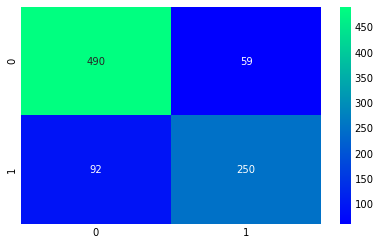

In [65]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

## Feature Importance

Text(0.5, 1.0, 'Feature Importance in AdaBoost')

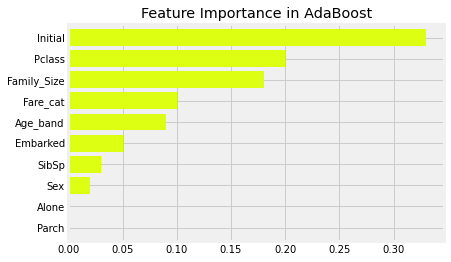

In [73]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
g = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, color='#ddff11')
g.set_title('Feature Importance in AdaBoost')